<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/5.%20Regression%20in%20TensorFlow%20Contd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

print(tf.__version__)

2.6.0


In [4]:
# Read in Data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
# One-hot encoding
# insurance_one_hot = pd.get_dummies(insurance)
# insurance_one_hot

In [74]:
X = insurance.drop(['charges'],axis=1)
y = insurance[['charges']]

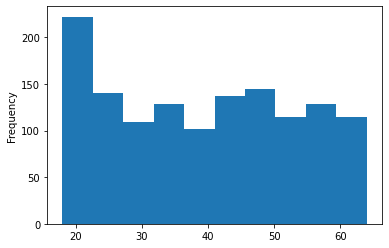

In [65]:
X['age'].plot(kind="hist")

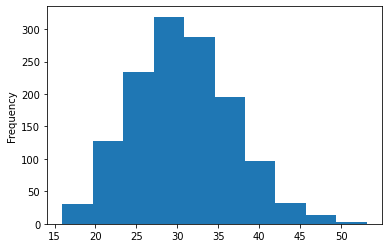

In [66]:
X['bmi'].plot(kind="hist")

In [70]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [76]:
# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),['sex','smoker','region'])
)

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [82]:
X_train

array([[0.2173913 , 0.56873823, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.13043478, 0.22235674, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02173913, 0.39359699, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.32608696, 0.54694646, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.89130435, 0.28087167, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.84782609, 0.74630078, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [77]:
tf.random.set_seed(5)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60,input_shape=[11]))
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.Dense(15))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=['mae'])

In [78]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 60)                720       
_________________________________________________________________
dense_40 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_41 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 16        
Total params: 3,031
Trainable params: 3,031
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 10840.9336 - mae: 10840.9336
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7065.3696 - mae: 7065.3696
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 4247.1875 - mae: 4247.1875
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3655.9014 - mae: 3655.9014
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 3568.9062 - mae: 3568.9062
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3619.5542 - mae: 3619.5542
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3725.0996 - mae: 3725.0996
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3586.8606 - mae: 3586.8606
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3569.0083 - mae: 3569.0083
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3549.8552 - mae: 3549.85

In [80]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3148.4692 - mae: 3148.4692


[3148.46923828125, 3148.46923828125]

Text(0.5, 0, 'epochs')

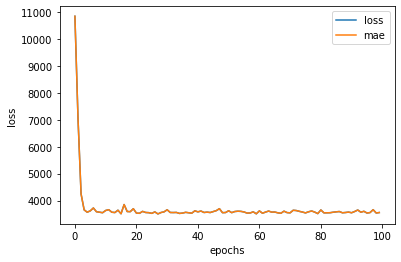

In [81]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")